<a href="https://colab.research.google.com/github/JohnMaleek/ML/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 1
Try to find a better (with less loss) feature to the univariate linear regression. (1p)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

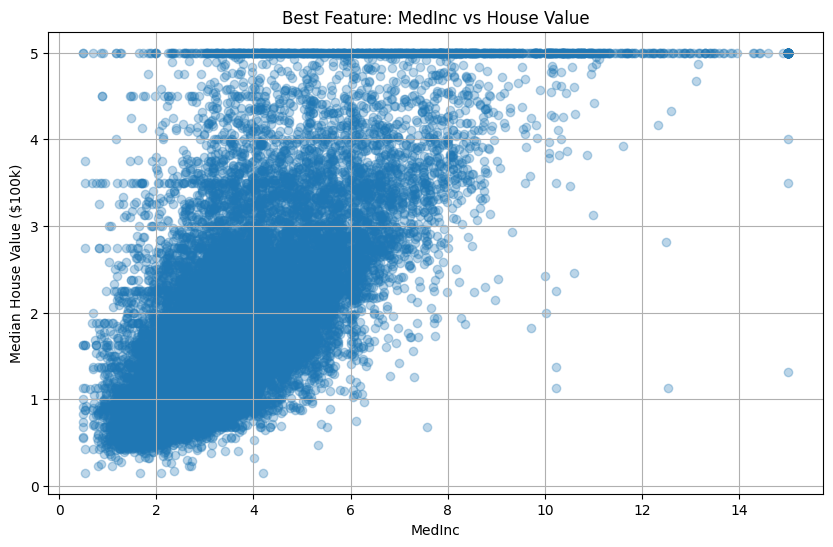

In [2]:
#All necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  #to get MSE (Mean Squared Error)
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
print(housing.DESCR)      #get a description of the dataset
print(housing.data.shape) #get (numer of rows, number of columns or 'features')
print(housing.target_names)

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)


#trying to compy data to X Variable
X = df.copy()
y = data.target

# Feature engineering candidates   ##important transforming raw data into better predictors for regression.##
X['LogPopulation'] = np.log(X['Population'] + 1e-6) #  #1e-6 To avoid: log(0) → undefined
X['LogAveOccup'] = np.log(X['AveOccup'] + 1e-6)
X['RoomsPerPerson'] = X['AveRooms'] / (X['Population'] + 1e-6)
X['BedroomRatio'] = X['AveBedrms'] / X['AveRooms']

#trying to evaluate each feature
results = []

for feature in X.columns:

    X_feat = X[[feature]]

    X_train, X_test, y_train, y_test = train_test_split(
        X_feat, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    model = LinearRegression()
    model.fit(X_train_scaled, y_train)


    pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, pred)

    results.append((feature, mse, model.coef_[0]))



results.sort(key=lambda x: x[1])

print("\nFeature Ranking (Lower MSE is better):\n")
for i, (feat, mse_val, coef) in enumerate(results):
    print(f"{i+1}. {feat:15}  MSE: {mse_val:.4f}  Coef: {coef:.4f}")


# Visualize Best Feature

best_feature = results[0][0]

plt.figure(figsize=(10, 6))
plt.scatter(X[best_feature], y, alpha=0.3)

plt.title(f"Best Feature: {best_feature} vs House Value")
plt.xlabel(best_feature)

plt.ylabel("Median House Value ($100k)")
plt.grid(True)

plt.show()

### Exercise 2

Visaulize the error surface (3D surface) of a linear regression model using the MedInc feature - choose the $β_{0}$ and $β_{1}$ parameters randomly and visaulize the MSEs for the training dataset. (1p)

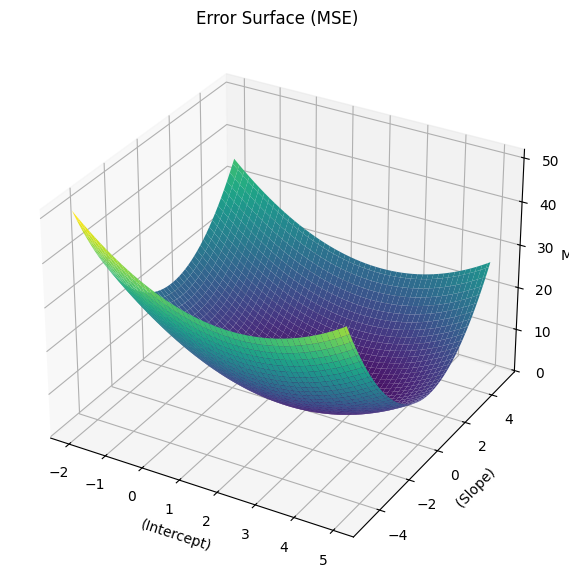

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = df[["MedInc"]].values
y = data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


def compute_mse(beta0, beta1, X, y):
    predictions = beta0 + beta1 * X.flatten()
    return np.mean((y - predictions) ** 2)


beta0_vals = np.linspace(-2, 5, 100)
beta1_vals = np.linspace(-5, 5, 100)

B0, B1 = np.meshgrid(beta0_vals, beta1_vals)
MSE_surface = np.zeros(B0.shape)

# Compute MSE for each (β0, β1)
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        MSE_surface[i, j] = compute_mse(
            B0[i, j], B1[i, j], X_train, y_train
        )


fig = plt.figure(figsize=(10, 7))          #X-axis → β₀ (intercept) Y-axis → β₁ (slope) Z-axis → MSE (error value)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(B0, B1, MSE_surface, cmap='viridis')

ax.set_xlabel("(Intercept)")
ax.set_ylabel(" (Slope)")
ax.set_zlabel("MSE")
ax.set_title("Error Surface (MSE) ")

plt.show()

### Exercise 3

Use the `Standard scaler` normalization on the MedInc feature of the housing dataset and fit a linear regressin model on the normalized feature. (1p)

**Hint: from sklearn.preprocessing import StandardScaler**

Model trained using normalized MedInc feature
MSE: 0.7091
Intercept (β0): 2.0719
Coefficient (β1): 0.7985


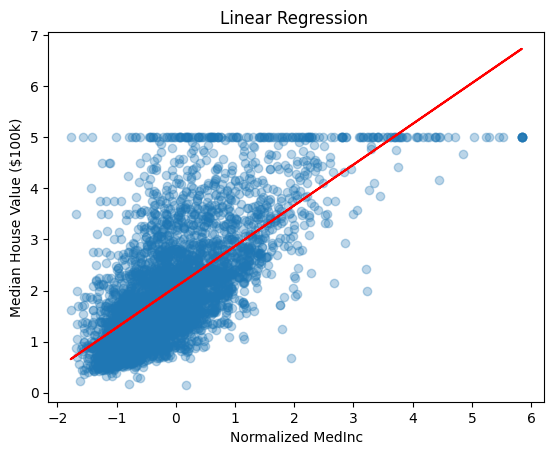

In [11]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = df[["MedInc"]]   # Use only MedInc
y = data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Apply StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

                                   # Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

              # Predictions

y_pred = model.predict(X_test_scaled)


                                        # Evaluate Model

mse = mean_squared_error(y_test, y_pred)

print("Model trained ")
print(f"MSE: {mse:.4f}")
print(f" (β0): {model.intercept_:.4f}")
print(f"(β1): {model.coef_[0]:.4f}")

                                        ##### OPTIONAL~~~~~~~~~Visualization
plt.scatter(X_test_scaled, y_test, alpha=0.3)
plt.plot(X_test_scaled, y_pred, color='red')
plt.xlabel("Normalized MedInc")
plt.ylabel("Median House Value ($100k)")
plt.title("Linear Regression ")
plt.show()

### Exercise 4
Define your own linear regression classifier. Write a Python class which has at least a **fit()** and a **predict()** method. Compare the prediction result of your model and the model from the scikit package. (2p)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#this is my class
class MyLinearRegression:

    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add bias column (x0 = 1)
        ones = np.ones((X.shape[0], 1))
        X_b = np.hstack((ones, X))

        # Normal Equation: theta = (X^T X)^(-1) X^T y
        self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X_b = np.hstack((ones, X))
        return X_b @ self.theta



data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = df[["MedInc"]].values
y = data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


my_model = MyLinearRegression()
my_model.fit(X_train, y_train)
my_pred = my_model.predict(X_test)

my_mse = mean_squared_error(y_test, my_pred)


sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
sk_pred = sk_model.predict(X_test)

sk_mse = mean_squared_error(y_test, sk_pred)


                                                   # Compare Results
print("Custom Linear Regression:", round(my_mse, 4))
print("Scikit-Learn Linear ", round(sk_mse, 4))

print("\nCustom (β0, β1):", my_model.theta)
print("Scikit Intercept:", sk_model.intercept_)
print("Scikit Coefficient:", sk_model.coef_)

Custom Linear Regression: 0.7091
Scikit-Learn Linear  0.7091

Custom (β0, β1): [2.07194694 0.79851956]
Scikit Intercept: 2.071946937378876
Scikit Coefficient: [0.79851956]
